In [6]:
import numpy as np
import helper_functions as hp

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
#from keras import backend as K

In [7]:
import tensorflow as tf
tf.test.gpu_device_name()
tf.test.is_gpu_available()

True

## Load in planetscope dataset and create a simple CNN with it.

In [8]:
# Load in planetscope data
#K.clear_session()
planetscope_images_tif, planetscope_labels_tif = hp.dataset_reader('planetscope_chips_90m_3class_classified_tiles')

reading in 30466 images


In [9]:
np.unique(planetscope_labels_tif, axis=0, return_counts=True)

(array([1, 2, 3], dtype=uint16), array([ 6236,   308, 23922], dtype=int64))

In [10]:
# Encode planetscope data
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(planetscope_labels_tif.reshape(-1, 1))
planetscope_new_labels = enc.transform(planetscope_labels_tif.reshape(-1, 1)).toarray().astype('uint8')

print(planetscope_new_labels[0])
print(planetscope_new_labels.shape)

[1 0 0]
(30466, 3)


In [11]:
# Shuffle labels and images and create a train test split for planetscope data
train_images, test_images, train_labels, test_labels = train_test_split(planetscope_images_tif, planetscope_new_labels, test_size=.2, shuffle=True)

#print(train_images[0])
#print(test_images[0])
#print(train_labels[0])
#print(test_labels[0])

In [12]:
# Create a simple model for the planetscope data 
model = hp.get_simple_model(train_images[0].shape)
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 50)        5050      
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 50)        200       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 50)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 30)        37530     
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 30)        120       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 30)          0         
_________________________________________

In [14]:
# Calculate initial test accuracy for planetscope data.
test_init = hp.get_test_accuracy(model, test_images, test_labels)
train_init = hp.get_train_accuracy(model, train_images, train_labels)

accuracy: 0.207
accuracy: 0.204


In [15]:
# Train model with planetscope data
history = model.fit(train_images, train_labels, epochs=30, validation_data=(test_images, test_labels))

Train on 24372 samples, validate on 6094 samples
Epoch 1/30
24372/24372 [==============================] - 4s 161us/sample - loss: 0.0952 - acc: 0.9741 - val_loss: 0.2990 - val_acc: 0.9042
Epoch 2/30
24372/24372 [==============================] - 4s 146us/sample - loss: 0.0683 - acc: 0.9803 - val_loss: 0.0925 - val_acc: 0.9762
Epoch 3/30
24372/24372 [==============================] - 4s 147us/sample - loss: 0.0623 - acc: 0.9812 - val_loss: 0.1459 - val_acc: 0.9711
Epoch 4/30
24372/24372 [==============================] - 3s 142us/sample - loss: 0.0558 - acc: 0.9834 - val_loss: 0.1735 - val_acc: 0.9724
Epoch 5/30
24372/24372 [==============================] - 4s 148us/sample - loss: 0.0546 - acc: 0.9832 - val_loss: 0.3932 - val_acc: 0.9352
Epoch 6/30
24372/24372 [==============================] - 4s 145us/sample - loss: 0.0531 - acc: 0.9835 - val_loss: 0.1449 - val_acc: 0.9757
Epoch 7/30
24372/24372 [==============================] - 3s 143us/sample - loss: 0.0502 - acc: 0.9840 - val_lo

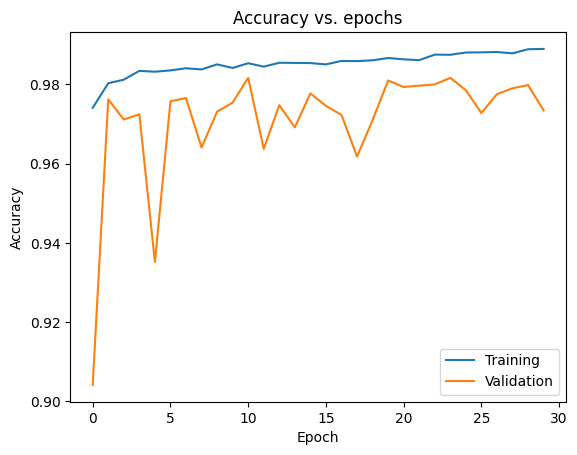

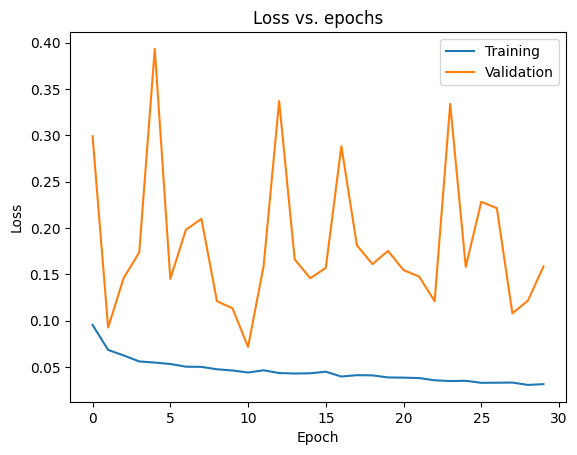

In [16]:
hp.plot_accuracy(history)
hp.plot_loss(history)

## Load in the naip data and create a simple CNN with it.

In [17]:
naip_images_tif, naip_labels_tif = hp.dataset_reader_naip('naip_2018_chips_90m_3class_classified_tiles')

reading in 30444 images
read in 30441 valid images and labels


In [18]:
np.unique(naip_labels_tif, axis = 0, return_counts=True)

(array([1, 2, 3], dtype=uint16), array([ 6204,   319, 23918], dtype=int64))

In [19]:
# Encode NAIP data
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(naip_labels_tif.reshape(-1, 1))
naip_new_labels = enc.transform(naip_labels_tif.reshape(-1, 1)).toarray().astype('uint8')

print(naip_new_labels[0])
print(naip_new_labels.shape)

[1 0 0]
(30441, 3)


In [20]:
# Shuffle labels and images and create a train test split for NAIP data
train_images, test_images, train_labels, test_labels = train_test_split(naip_images_tif, naip_new_labels, test_size=.2, shuffle=True)

In [21]:
# Create a simple model for the NAIP data 
model = hp.get_simple_model(train_images[0].shape)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 90, 90, 50)        5050      
_________________________________________________________________
batch_normalization_4 (Batch (None, 90, 90, 50)        200       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 45, 45, 50)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 45, 45, 30)        37530     
_________________________________________________________________
batch_normalization_5 (Batch (None, 45, 45, 30)        120       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 30)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 14520)            

In [22]:
# Calculate initial test accuracy for NAIP data.
test_init = hp.get_test_accuracy(model, test_images, test_labels)
train_init = hp.get_train_accuracy(model, train_images, train_labels)

accuracy: 0.010
accuracy: 0.011


In [23]:
# Train model with NAIP data
history = model.fit(train_images, train_labels, epochs=30, validation_data=(test_images, test_labels))

Train on 24352 samples, validate on 6089 samples
Epoch 1/30
24352/24352 [==============================] - 10s 410us/sample - loss: 0.0993 - acc: 0.9760 - val_loss: 0.2797 - val_acc: 0.9189
Epoch 2/30
24352/24352 [==============================] - 10s 396us/sample - loss: 0.0618 - acc: 0.9826 - val_loss: 1.0621 - val_acc: 0.7247
Epoch 3/30
24352/24352 [==============================] - 10s 399us/sample - loss: 0.0463 - acc: 0.9858 - val_loss: 0.0600 - val_acc: 0.9809
Epoch 4/30
24352/24352 [==============================] - 10s 395us/sample - loss: 0.0405 - acc: 0.9874 - val_loss: 0.1641 - val_acc: 0.9855
Epoch 5/30
24352/24352 [==============================] - 10s 395us/sample - loss: 0.0323 - acc: 0.9892 - val_loss: 0.0492 - val_acc: 0.9846
Epoch 6/30
24352/24352 [==============================] - 10s 411us/sample - loss: 0.0264 - acc: 0.9912 - val_loss: 0.0434 - val_acc: 0.9872
Epoch 7/30
24352/24352 [==============================] - 10s 407us/sample - loss: 0.0237 - acc: 0.9930 -

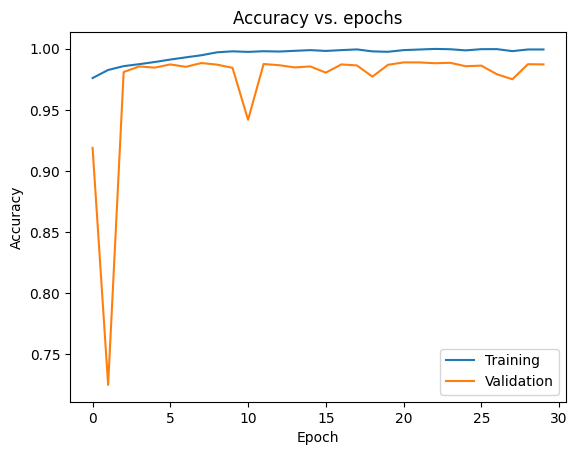

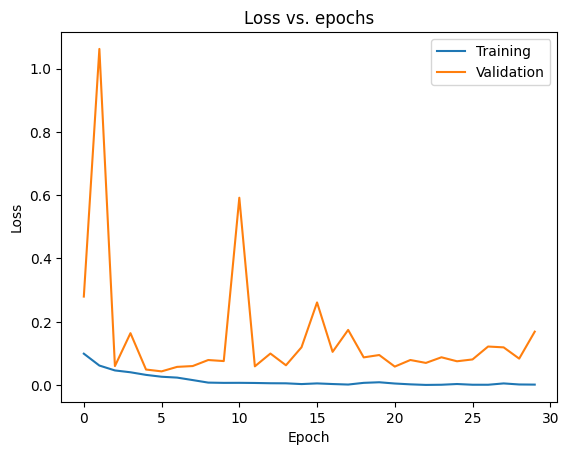

In [24]:
hp.plot_accuracy(history)
hp.plot_loss(history)